<a id="contents"></a><br>
# Contents
1. [setup](#setup)
2. [Check out read depths](#readDepth)


<a id="setup"></a>
Here is a quick look into the 16s that came from Werner's peat samples.

In [1]:
library(dada2)
library(phyloseq)
library(Biostrings)
library(ape)
library(ggplot2)
library(RColorBrewer)
load(file="/home/daniel/Documents/projects/wernerSphagnum/sequenceAnalysis/peat16sPS.rda")

Loading required package: Rcpp

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, table,
    tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges


Attaching package: ‘IRanges’


The following object is ma

In [2]:
options(repr.plot.width = 20, repr.plot.height = 10)

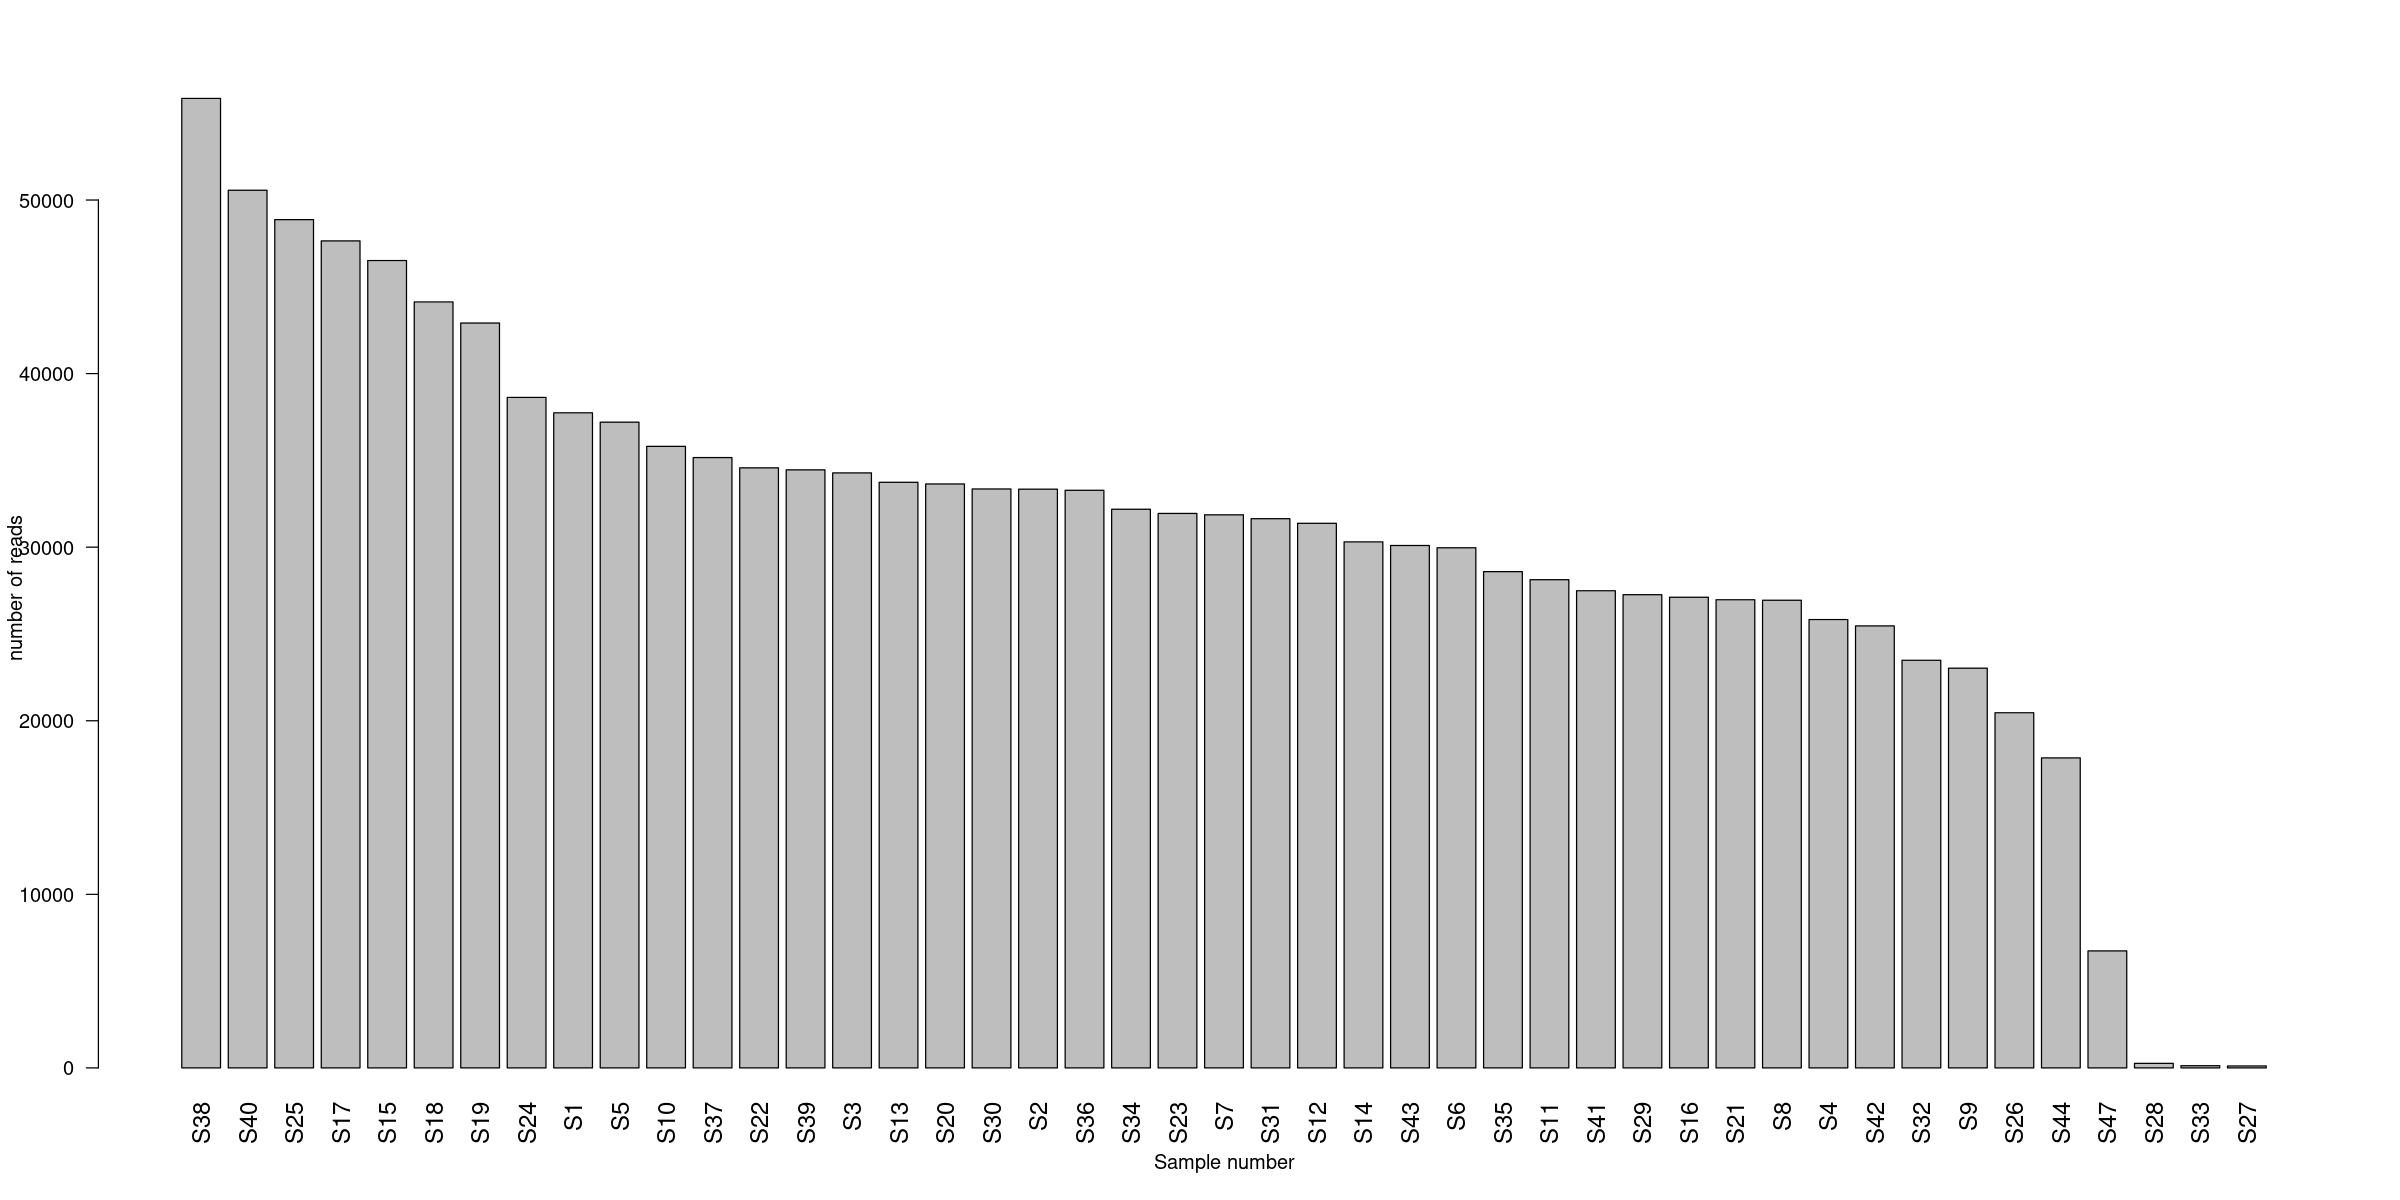

In [3]:
barplot(sort(sample_sums(ps), decreasing=TRUE), 
        ylab="number of reads",
        xlab="Sample number",
        cex.names=1.2, 
        las=2)

Looks like three samples essentially failed: S27, S28, and S33. These are:

In [4]:
sample_data(ps)[c("S27","S28","S33")]

,SampleID,Subsite,DepthSection,EcoCont,Core
,<chr>,<chr>,<dbl>,<chr>,<chr>
S27,AT2_43-63,Thermokarst,1,Ecological,AT2
S28,AT2_63-83,Thermokarst,2,Ecological,AT2
S33,AT3_80-100,Thermokarst,2,Ecological,AT3


Let's normalize by total read numbers in each sample (crude first adjustment to make them comparable). We'll also get ride of the low abundance samples and controls

In [5]:
ps.prop <- transform_sample_counts(ps, function(otu) otu/sum(otu))
nonCfilt <- sample_data(ps.prop)$EcoCont != "Control"
ps.prop.noC <- prune_samples(nonCfilt, ps.prop)
nonLowAbuFilt <- !(sample_names(ps.prop.noC) %in% c("S27","S28","S33"))
ps.prop.noC <- prune_samples(nonLowAbuFilt, ps.prop.noC)

Just curious, are there archea in there? Many of these will be our Methanogens and other fermenters:

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.
ℹ The deprecated feature was likely used in the phyloseq package.
  Please report the issue at <https://github.com/joey711/phyloseq/issues>.”


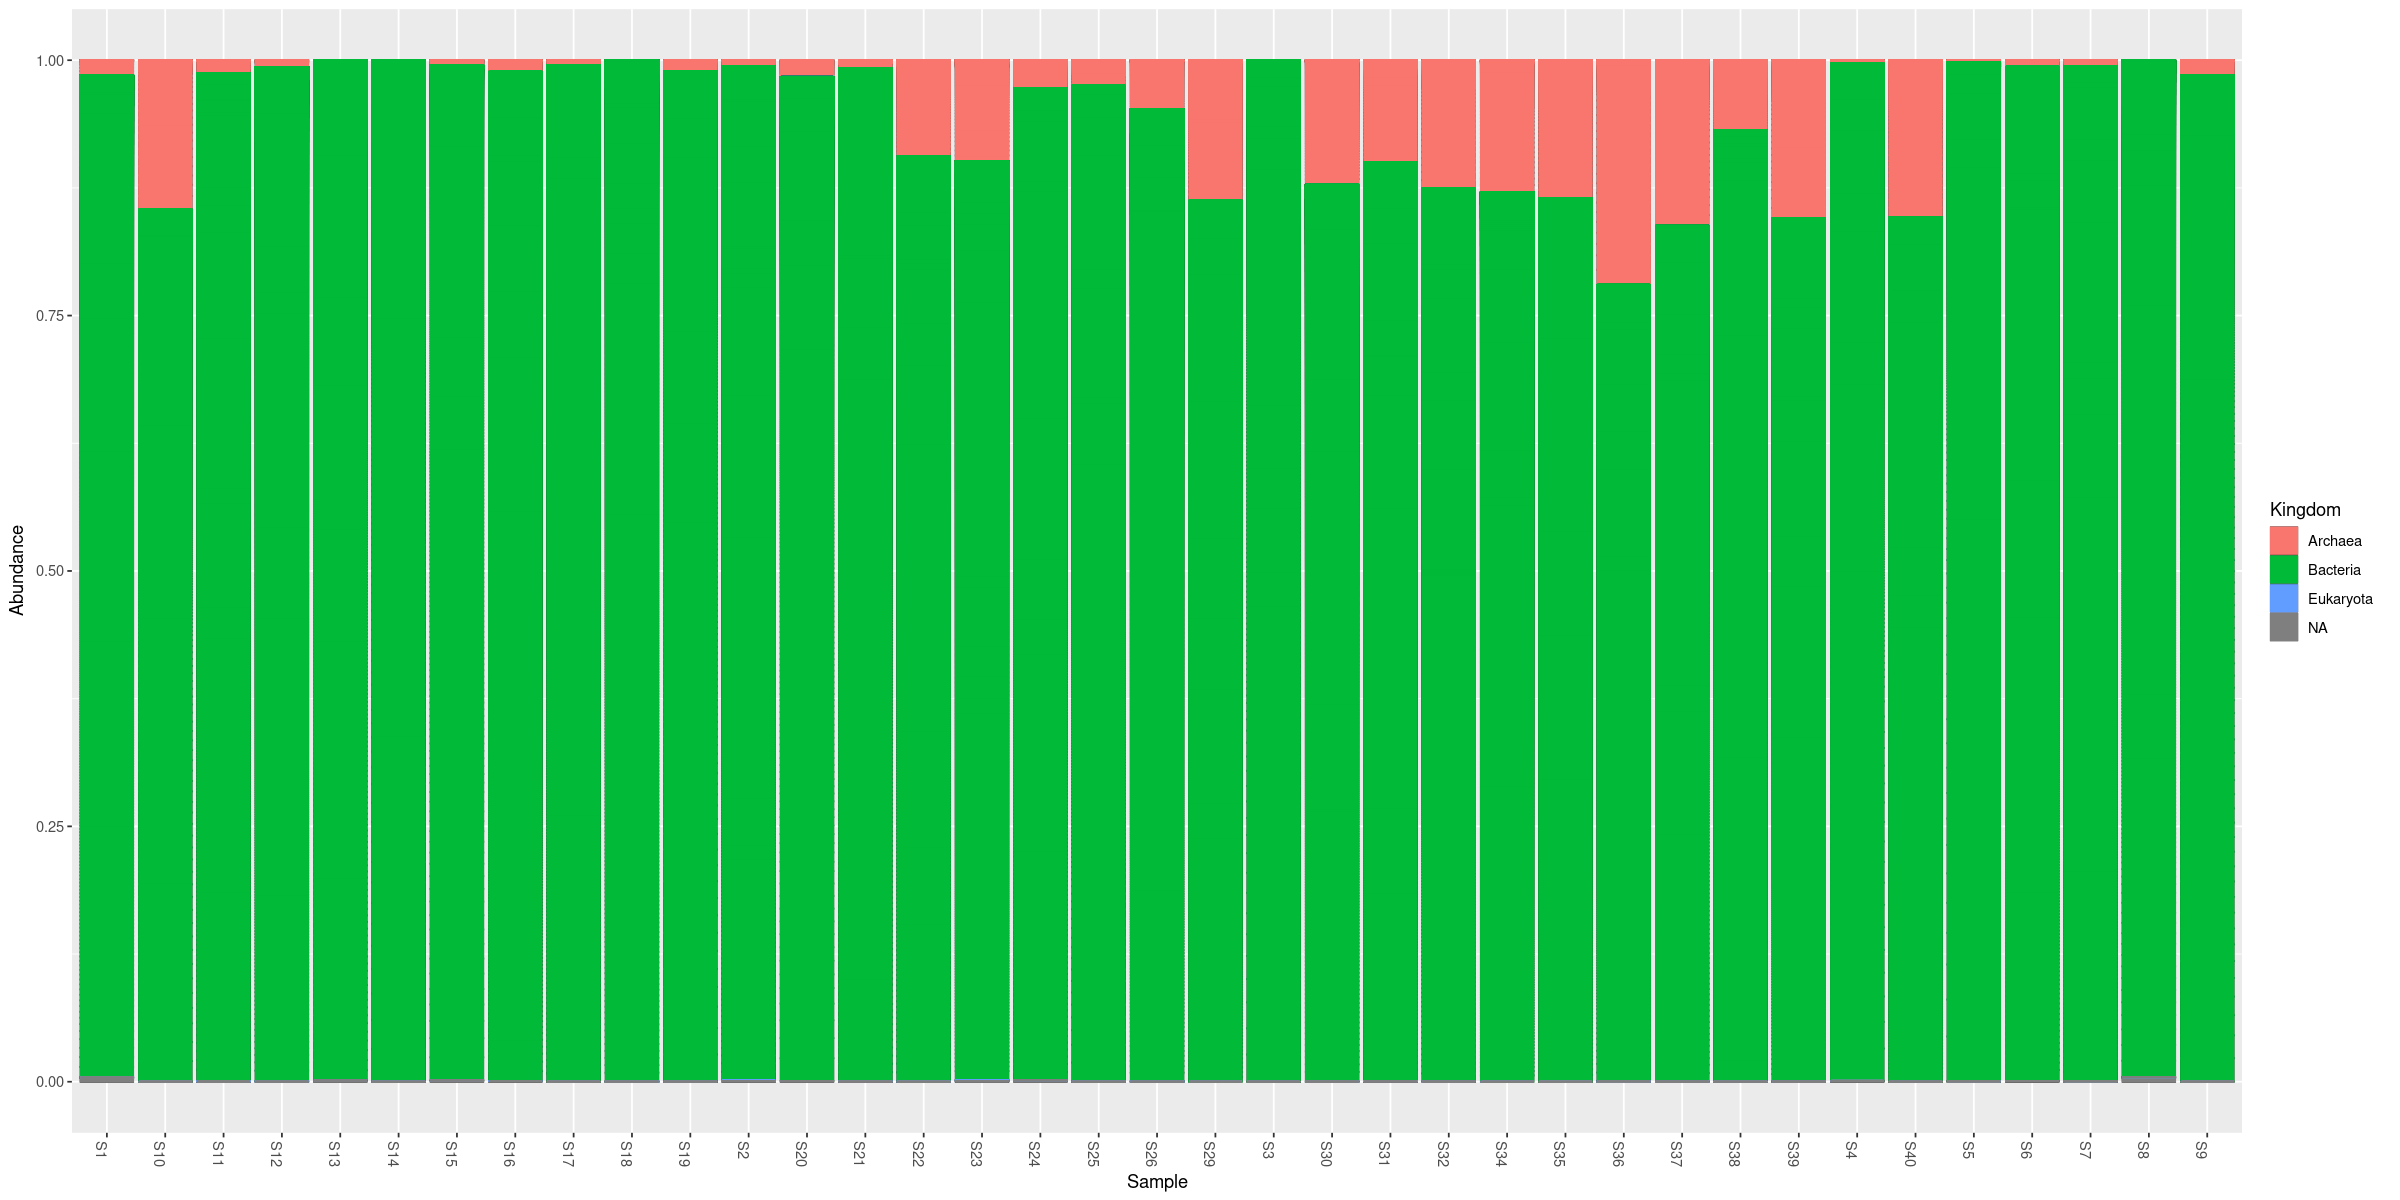

In [6]:
plot_bar(ps.prop.noC, fill = "Kingdom") +
  geom_bar(aes(color=Kingdom, fill=Kingdom), stat="identity", position="stack")

If we look at some of these samples that have more Archaea, they look like they are thermokarst:

In [7]:
sample_data(ps)[c("S35","S36","S37","S40")] 

,SampleID,Subsite,DepthSection,EcoCont,Core
,<chr>,<chr>,<dbl>,<chr>,<chr>
S35,AT3_160-180,Thermokarst,5,Ecological,AT3
S36,AT5_0-40,Thermokarst,0,Ecological,AT5
S37,AT5_50-70,Thermokarst,1,Ecological,AT5
S40,AT5_150-170,Thermokarst,5,Ecological,AT5


And the ones without Archaea tend to be palsa:

In [8]:
sample_data(ps)[c("S4","S13","S14","S18")]

,SampleID,Subsite,DepthSection,EcoCont,Core
,<chr>,<chr>,<dbl>,<chr>,<chr>
S4,AP1_80-100,Palsa,4,Ecological,AP1
S13,AP3_50-69,Palsa,3,Ecological,AP3
S14,AP3_80-100,Palsa,4,Ecological,AP3
S18,AP4_50-70,Palsa,3,Ecological,AP4


Let's ordinate and label by depth and subsite (palsa or thermokarst):

In [9]:
s.prop.noC.ord <- ordinate(ps.prop.noC, "NMDS", "bray")

Run 0 stress 0.1280735 
Run 1 stress 0.1280735 
... Procrustes: rmse 6.831508e-06  max resid 2.961703e-05 
... Similar to previous best
Run 2 stress 0.1280735 
... Procrustes: rmse 4.914757e-06  max resid 2.102393e-05 
... Similar to previous best
Run 3 stress 0.1280735 
... Procrustes: rmse 6.19629e-06  max resid 2.693133e-05 
... Similar to previous best
Run 4 stress 0.1280735 
... Procrustes: rmse 7.004576e-06  max resid 3.044058e-05 
... Similar to previous best
Run 5 stress 0.1966039 
Run 6 stress 0.1280735 
... Procrustes: rmse 5.031667e-06  max resid 2.155023e-05 
... Similar to previous best
Run 7 stress 0.1280735 
... Procrustes: rmse 2.736458e-06  max resid 6.563217e-06 
... Similar to previous best
Run 8 stress 0.1280735 
... Procrustes: rmse 5.363383e-06  max resid 2.280578e-05 
... Similar to previous best
Run 9 stress 0.1280735 
... Procrustes: rmse 5.876338e-06  max resid 2.537495e-05 
... Similar to previous best
Run 10 stress 0.1868678 
Run 11 stress 0.1280735 
... Pro

In [10]:
bb <- plot_ordination(ps.prop.noC, ps.prop.noC.ord, 
   color="DepthSection",
   shape="Subsite",
)

lbs <- geom_text(label=sample_data(ps.prop.noC)$Core,
                 color = "black",
                 nudge_x = 0.05, nudge_y = 0.05,
                 check_overlap = T)

myPalette <- colorRampPalette(rev(brewer.pal(8, "YlOrBr")))
sc <- scale_colour_gradientn(colours = myPalette(100), limits=c(5, 0), trans="reverse")
bb + sc + lbs + geom_point(size=3.5)

Warning message in scores(ordination, choices = axes, display = "species", physeq = physeq):
“restarting interrupted promise evaluation”
Warning message in plot_ordination(ps.prop.noC, ps.prop.noC.ord, color = "DepthSection", :
“Could not obtain coordinates from the provided `ordination`. 
Please check your ordination method, and whether it is supported by `scores` or listed by phyloseq-package.”


NULL

For some reason that won't work inside the jupyter notebook. Works on my terminal, this is the output:

<img src="ordinationPeat.png" width="950" height="450">